A big part of machine learning is classification — we want to know what class (a.k.a. group) an observation belongs to. The ability to precisely classify observations is extremely valuable for various business applications like predicting whether a particular user will buy a product or forecasting whether a given loan will default or not.<br>Data science provides a plethora of classification algorithms such as logistic regression, support vector machine, naive Bayes classifier, and decision trees. But near the top of the classifier hierarchy is the random forest classifier.<br>In this post, we will examine how basic decision trees work, how individual decisions trees are combined to make a random forest, and ultimately discover why random forests are so good at what they do.<br>
### Decision Trees<br>
Let’s quickly go over decision trees as they are the building blocks of the random forest model. Fortunately, they are pretty intuitive. I’d be willing to bet that most people have used a decision tree, knowingly or not, at some point in their lives.<br>It’s probably much easier to understand how a decision tree works through an example.<br>
<center><img src="https://miro.medium.com/max/1000/1*LMoJmXCsQlciGTEyoSN39g.jpeg"><h6>Simple Decision Tree Example</h6></center><br>Imagine that our dataset consists of the numbers at the top of the figure to the left. We have two 1s and five 0s (1s and 0s are our classes) and desire to separate the classes using their features. The features are color (red vs. blue) and whether the observation is underlined or not. So how can we do this?<br>Color seems like a pretty obvious feature to split by as all but one of the 0s are blue. So we can use the question, “Is it red?” to split our first node. You can think of a node in a tree as the point where the path splits into two — observations that meet the criteria go down the Yes branch and ones that don’t go down the No branch.<br>The No branch (the blues) is all 0s now so we are done there, but our Yes branch can still be split further. Now we can use the second feature and ask, “Is it underlined?” to make a second split.
The two 1s that are underlined go down the Yes subbranch and the 0 that is not underlined goes down the right subbranch and we are all done. Our decision tree was able to use the two features to split up the data perfectly. Victory!<br>Obviously in real life our data will not be this clean but the logic that a decision tree employs remains the same. At each node, it will ask —<br><i>What feature will allow me to split the observations at hand in a way that the resulting groups are as different from each other as possible (and the members of each resulting subgroup are as similar to each other as possible)?</i><br>


### The Random Forest Classifier
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).<br><center><img src="https://miro.medium.com/max/1000/1*VHDtVaDPNepRglIAv72BFg.jpeg"><h6>Visualization of a Random Forest Model Making a Prediction</h6></center><br>The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:<br><b>A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.</b>The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions.<b>The reason for this wonderful effect is that the trees protect each other from their individual errors </b>(as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. So the prerequisites for random forest to perform well are:<br><ul>
<li>There needs to be some actual signal in our features so that models built using those features do better than random guessing.</li>
<li>The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.</li></ul><br>

### An Example of Why Uncorrelated Outcomes are So Great<br>
The wonderful effects of having many uncorrelated models is such a critical concept that I want to show you an example to help it really sink in. Imagine that we are playing the following game:<br>
<ul>
    <li>I use a uniformly distributed random number generator to produce a number.</li>
    <li>If the number I generate is greater than or equal to 40, you win (so you have a 60% chance of victory) and I pay you some money. If it is below 40, I win and you pay me the same amount.</li>
    <li>Now I offer you the the following choices. We can either:</li>
        <ol>
               <li>Game 1 — play 100 times, betting 1 Dollar each time.</li>
               <li>Game 2— play 10 times, betting 10 Dollars each time.</li>
               <li>Game 3— play one time, betting 100 Dollars.</li>
         </ol>
</ul><br>
Which would you pick? The expected value of each game is the same:<br>
<i>Expected Value Game 1 = (0.60*1 + 0.40*-1)*100 = 20<br>
Expected Value Game 2= (0.60*10 + 0.40*-10)*10 = 20<br>
Expected Value Game 3= 0.60*100 + 0.40*-100 = 20<br></i><br>
What about the distributions? Let’s visualize the results with a Monte Carlo simulation (we will run 10,000 simulations of each game type; <b>for example, we will simulate 10,000 times the 100 plays of Game 1).</b> Take a look at the chart below — now which game would you pick? Even though the expected values are the same, <b>the outcome distributions are vastly different going from positive and narrow (blue) to binary (pink).</b><center><img src="https://miro.medium.com/max/750/1*R0Hxdwdle4eiwUBMX9BkLw.png"><h6>Outcome Distribution of 10,000 Simulations for each Game</h6></center><br>Game 1 (where we play 100 times) offers up the best chance of making some money — out of the 10,000 simulations that I ran, you make money in 97% of them! For Game 2 (where we play 10 times) you make money in 63% of the simulations, a drastic decline (and a drastic increase in your probability of losing money). And Game 3 that we only play once, you make money in 60% of the simulations, as expected.<center><img src="https://miro.medium.com/max/977/1*0CXF54TEkRka-2JfEQSFnw.jpeg"><h6>Probability of Making Money for Each Game</h6></center><br>So even though the games share the same expected value, their outcome distributions are completely different. The more we split up our 100 Dollars bet into different plays, the more confident we can be that we will make money. As mentioned previously, this works because each play is independent of the other ones.<br>Random forest is the same — each tree is like one play in our game earlier. We just saw how our chances of making money increased the more times we played. Similarly, with a random forest model, our chances of making correct predictions increase with the number of uncorrelated trees in our model.<br>

Game 1 Mean:  19.97
Game 1 Prob Positive:  0.97


Game 2 Mean:  20.16
Game 2 Prob Positive:  0.63


Game 3 Mean:  20.74
Game 3 Prob Positive:  0.6


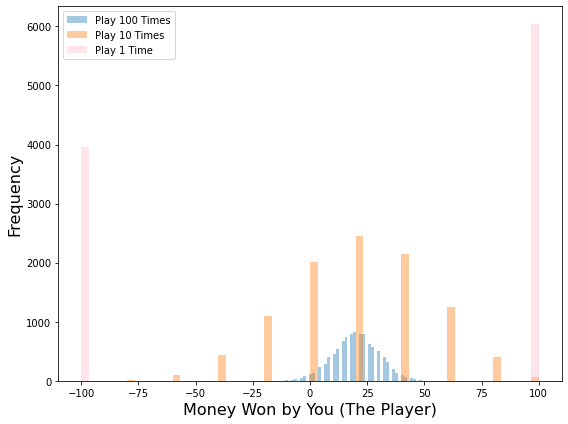

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Game 1
simulations = 10000  # number of Monte Carlo Simulations
games = 100          # number of times the game is played
threshold = 40       # threshold where if greater than or equal to you win
bet = 1              # dollar bet for the game

# outer loop is Monte Carlo sims and inner loop is games played
sim_results_1 = []
for sim in range(simulations):
    result = []
    for g in range(games):
        number = int(np.random.uniform()*100)  # get a random number to see who wins
        if number >= threshold:
            result.append(bet)
        else:
            result.append(-bet)
    sim_results_1.append(sum(result))          # sim_results_1 stores results for Game 1
print('Game 1 Mean: ', round(np.mean(sim_results_1), 2))
print('Game 1 Prob Positive: ', round(sum([1 for i in sim_results_1 if i>0])/simulations, 2))
print('\n')
    

# Game 2 (structure of code is same as above)
simulations = 10000
games = 10
threshold = 40
bet = 10

sim_results_2 = []
for sim in range(simulations):
    result = []
    for g in range(games):
        number = int(np.random.uniform()*100)
        if number >= threshold:
            result.append(bet)
        else:
            result.append(-bet)
    sim_results_2.append(sum(result))
print('Game 2 Mean: ', round(np.mean(sim_results_2), 2))
print('Game 2 Prob Positive: ', round(sum([1 for i in sim_results_2 if i>0])/simulations, 2))
print('\n')
    
    
# Game 3 (structure of code is same as above)
simulations = 10000
games = 1
threshold = 40
bet = 100

sim_results_3 = []
for sim in range(simulations):
    result = []
    for g in range(games):
        number = int(np.random.uniform()*100)
        if number >= threshold:
            result.append(bet)
        else:
            result.append(-bet)
    sim_results_3.append(sum(result))
print('Game 3 Mean: ', round(np.mean(sim_results_3), 2))
print('Game 3 Prob Positive: ', round(sum([1 for i in sim_results_3 if i>0])/simulations, 2))


# Histogram that shows the distribution of the Monte Carlo Results for 2 spending levels
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(sim_results_1, kde=False, bins=60, label='Play 100 Times')
sns.distplot(sim_results_2, kde=False, bins=60, label='Play 10 Times')
sns.distplot(sim_results_3, kde=False, bins=60, label='Play 1 Time', color='pink')

ax.set_xlabel('Money Won by You (The Player)', fontsize=16)
ax.set_ylabel('Frequency',fontsize=16)
plt.legend()
plt.tight_layout()

plt.savefig(fname='game_hist', dpi=150)
plt.show()

### Ensuring that the Models Diversify Each Other<br>
So how does random forest ensure that the behavior of each individual tree is not too correlated with the behavior of any of the other trees in the model? It uses the following two methods:<br>
<b>Bagging (Bootstrap Aggregation) — Decisions trees are very sensitive to the data they are trained on — small changes to the training set can result in significantly different tree structures.</b> Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset with replacement, resulting in different trees. This process is known as bagging.<br>
Notice that with bagging we are not subsetting the training data into smaller chunks and training each tree on a different chunk. Rather, if we have a sample of size N, we are still feeding each tree a training set of size N (unless specified otherwise). But instead of the original training data, we take a random sample of size N with replacement. For example, if our training data was [1, 2, 3, 4, 5, 6] then we might give one of our trees the following list [1, 2, 2, 3, 6, 6]. Notice that both lists are of length six and that “2” and “6” are both repeated in the randomly selected training data we give to our tree (because we sample with replacement).<br><b>Feature Randomness —</b> In a normal decision tree, when it is time to split a node, we consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.<br><center><img src="https://miro.medium.com/max/1000/1*EemYMyOADnT0lJWSXmTDdg.jpeg"><h6>Node splitting in a random forest model is based on a random subset of features for each tree.</h6></center><br>
Let’s go through a visual example — in the picture above, the traditional decision tree (in blue) can select from all four features when deciding how to split the node. It decides to go with Feature 1 (black and underlined) as it splits the data into groups that are as separated as possible.<br>
Now let’s take a look at our random forest. We will just examine two of the forest’s trees in this example. When we check out random forest Tree 1, we find that it it can only consider Features 2 and 3 (selected randomly) for its node splitting decision. We know from our traditional decision tree (in blue) that Feature 1 is the best feature for splitting, but Tree 1 cannot see Feature 1 so it is forced to go with Feature 2 (black and underlined). Tree 2, on the other hand, can only see Features 1 and 3 so it is able to pick Feature 1.<br>
<i>So in our random forest, we end up with trees that are not only trained on different sets of data (thanks to bagging) but also use different features to make decisions.</i><br>
And that creates uncorrelated trees that buffer and protect each other from their errors.<br>
### Conclusion<br>
Random forests are a personal favorite of mine. Coming from the world of finance and investments, the holy grail was always to build a bunch of uncorrelated models, each with a positive expected return, and then put them together in a portfolio to earn massive alpha (alpha = market beating returns). Much easier said than done!<br>
Random forest is the data science equivalent of that. Let’s review one last time. What’s a random forest classifier?<br>
<i>The random forest is a classification algorithm consisting of many decisions trees. <b>It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees</b> whose prediction by committee is more accurate than that of any individual tree.</i><br>
What do we need in order for our random forest to make accurate class predictions?<br>
<ol>
    <li><b>We need features that have at least some predictive power.</b> After all, if we put garbage in then we will get garbage out.</li>
    <li><b>The trees of the forest and more importantly their predictions need to be uncorrelated</b> (or at least have low correlations with each other). While the algorithm itself via feature randomness tries to engineer these low correlations for us, the features we select and the hyper-parameters we choose will impact the ultimate correlations as well.</li></ol>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [6]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

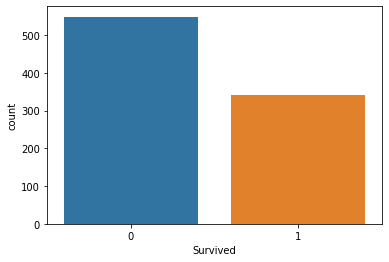

In [7]:
sns.countplot(train['Survived'])

In [8]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

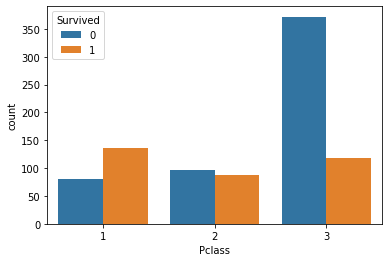

In [9]:
sns.countplot(train['Pclass'], hue=train['Survived'])

In [10]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [11]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
the            1
Jonkheer.      1
Lady.          1
Sir.           1
Capt.          1
Don.           1
Mme.           1
Ms.            1
Name: Name_Title, dtype: int64

In [12]:
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

In [13]:
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

In [14]:
pd.qcut(train['Name_Len'],5).value_counts()

(11.999, 19.0]    204
(23.0, 27.0]      197
(32.0, 82.0]      169
(27.0, 32.0]      165
(19.0, 23.0]      156
Name: Name_Len, dtype: int64

In [15]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [16]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [17]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [18]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [19]:
pd.qcut(train['Age'],5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

In [20]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [21]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [22]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [23]:
train['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
train['Ticket'].head(n=8)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
Name: Ticket, dtype: object

In [25]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))

In [26]:
train['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
12     10
13     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [27]:
train['Ticket_Lett'] = train['Ticket'].apply(lambda x:str(x)[0])
train['Ticket_Lett'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [28]:
train.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

In [29]:
pd.qcut(train['Fare'],3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [30]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

In [31]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


In [32]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [33]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [34]:
train['Cabin_num'] = train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
train['Cabin_num'].replace('an', np.NaN, inplace = True)
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
pd.qcut(train['Cabin_num'],3).value_counts()

(1.999, 28.667]     67
(65.667, 148.0]     67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [35]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

In [36]:
train['Survived'].corr(train['Cabin_num'])

-0.06384595922789353

In [37]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [39]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

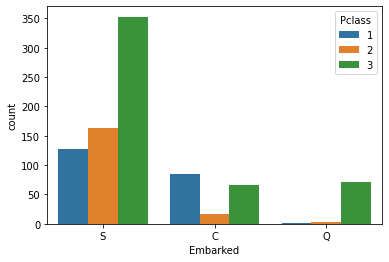

In [40]:
sns.countplot(train['Embarked'], hue=train['Pclass'])

In [41]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

In [42]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

In [43]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

In [44]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

In [45]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [46]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

In [47]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [48]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [49]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [50]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [51]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
train, test = fam_size(train, test)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = ticket_grouped(train, test)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett','Cabin_Letter', 'Name_Title', 'Fam_Size'])
train, test = drop(train, test)

In [52]:
print(len(train.columns))

45
